**Проект 3. Анализ воронки**

Рассматривается мобильная игра Quiz Freeze. Это сборник вопросов в различных форматах и темах, на которые игрокам нужно давать ответы. Игра одиночная, то есть каждый игрок отвечает на вопросы самостоятельно.

Игра состоит из 6 этапов:
1. Регистрация
2. Старт обучения
3. Завершение обучения
4. Выбор уровня сложности
5. Выбор пакетов вопросов
6. Покупка платных вопросов

**ЦЕЛЬ**

Исследовать поведение пользователей в обновлённом приложении.

**ЗАДАЧИ**

1. Определить, насколько обучение сокращает время прохождения этапов игры.
2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.
3. Определить, насколько прозрачен процесс взаимодействия с игрой.

**КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)**
1. Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.
2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 
3. Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

**Подготовка данных**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
events_df = pd.read_csv('Project3/7_4_Events.csv')
purchase_df = pd.read_csv('Project3/purchase.csv')

In [3]:
# Из исходного датафрейма Events_df создаем новый датафрейм с данными по пользователям, зарегистрировавшимся 
# в 2018 году.
mask1 = (events_df['start_time']>='2018-01-01') & (events_df['start_time']<'2019-01-01')
mask2 = events_df['event_type'] == 'registration'

user_2018 = events_df[mask1 & mask2]['user_id'].to_list()
events_2018 = events_df[events_df['user_id'].isin(user_2018)].copy()
display(events_2018)

,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01T03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01T04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01T08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01T11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01T13:28:07,NaN,27836
...,...,...,...,...,...,...
118359,147262,tutorial_start,NaN,2019-01-01T03:26:18,49554.0,47756
118360,147263,tutorial_finish,NaN,2019-01-01T03:29:25,49554.0,47756
118362,147265,level_choice,easy,2019-01-01T05:04:52,NaN,47755
118363,147266,level_choice,medium,2019-01-01T05:42:11,NaN,47756


In [4]:
events_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66959 entries, 51405 to 118364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              66959 non-null  int64  
 1   event_type      66959 non-null  object 
 2   selected_level  8342 non-null   object 
 3   start_time      66959 non-null  object 
 4   tutorial_id     32954 non-null  float64
 5   user_id         66959 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
# Создаем датафрейм с данными о покупках пользователями, зарегистрировавшимися в 2018 году.
purchase_2018=purchase_df[purchase_df['user_id'].isin(user_2018)].copy()
purchase_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1600 non-null   int64 
 1   user_id         1600 non-null   int64 
 2   event_datetime  1600 non-null   object
 3   amount          1600 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.5+ KB


In [6]:
# Определяем количество пользователей, зарегистрировавшихся в 2018 году.
all_users = set (events_2018['user_id'])
display ('Количество пользователей, зарегистрировавшихся в 2018 году:', len(all_users))

'Количество пользователей, зарегистрировавшихся в 2018 году:'

19926

In [7]:
# Пользователи, начавшие обучение:
users_tutorial_started = set (events_2018[events_2018['event_type'] == 'tutorial_start']['user_id'])

# Пользователи, завершившие обучение:
users_tutorial_completed = set (events_2018[events_2018['event_type'] == 'tutorial_finish']['user_id'])

# Пользователи, начавшие, но не завершившие обучение:
uses_tutorial_started_not_finished = users_tutorial_started.difference(users_tutorial_completed)

# Пользователи, которые не проходили обучение:
users_without_tutorial = all_users.difference(users_tutorial_started)

display('Количество пользователей, прошедших обучение', len(users_tutorial_completed))
display('Количество пользователей, начавших, но не завершивших обучение', len(uses_tutorial_started_not_finished))
display('Количество пользователей без обучения', len(users_without_tutorial))

'Количество пользователей, прошедших обучение'

10250

'Количество пользователей, начавших, но не завершивших обучение'

1608

'Количество пользователей без обучения'

8068

In [8]:
# Добавляем новый столбец с признаком события 'purchase'  в датафрейм purchase_2018.
purchase_2018['event_type'] = 'purchase'
display(purchase_2018)

,id,user_id,event_datetime,amount,event_type
1171,16845,27845,2018-01-03T18:53:43,100,purchase
1172,16846,27865,2018-01-04T14:46:10,250,purchase
1174,16848,27911,2018-01-07T08:19:12,50,purchase
1175,16849,27910,2018-01-07T12:11:34,100,purchase
1176,16850,27940,2018-01-07T13:16:41,200,purchase
...,...,...,...,...,...
2767,18441,47498,2019-01-02T03:48:19,100,purchase
2768,18442,47647,2019-01-02T23:26:26,150,purchase
2769,18443,47554,2019-01-03T00:36:36,50,purchase
2774,18448,47742,2019-01-04T12:51:41,50,purchase


In [9]:
# Перед объединением датафреймов переименовываем названия столбцов.
events_2018 = events_2018.rename(columns={"id": "event_id"})
purchase_2018 = purchase_2018.rename(columns={"id": "purchase_id", "event_datetime": "start_time"})

# Объединяем датафреймы, сортируем по возрастанию временени событий, переводим дату и время в формат Datetime.
total_events_df = pd.concat([events_2018,purchase_2018],sort=False)
total_events_df = total_events_df.reset_index(drop=True).sort_values('start_time')
total_events_df['start_time'] = pd.to_datetime(total_events_df['start_time'])
total_events_df.head()

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN


**Гипотеза №1.** Влияет ли обучение на скорость прохождения других этапов игры?

In [10]:
# Создаем функцию для разделения пользователей на группы в зависимости от прохождения обучения.
def user_groups(x):
    if x in users_tutorial_completed:
        return "tutorial_completed"
    elif x in uses_tutorial_started_not_finished:
        return "tutorial_start"
    else:
        return "wo_tutorial"

# Добавляем новый столбец с признаком принадлежности к группе пользователей.    
total_events_df['user_groups'] = total_events_df['user_id'].apply(user_groups)
display(total_events_df)

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount,user_groups
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN,wo_tutorial
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN,tutorial_completed
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN,tutorial_completed
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN,tutorial_completed
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN,tutorial_completed
...,...,...,...,...,...,...,...,...,...
68554,NaN,purchase,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0,tutorial_completed
68555,NaN,purchase,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0,tutorial_completed
68556,NaN,purchase,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0,tutorial_completed
68557,NaN,purchase,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0,tutorial_completed


In [11]:
# Создаем сводную таблицу по минимальным значениям даты и времени каждого этапа пути для каждого пользователя
pivot = total_events_df.pivot_table(
    values='start_time',
    index=['user_id','user_groups'],
    columns='event_type',
    aggfunc='min'
)
display(pivot)

,event_type,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
user_id,user_groups,,,,,,
27832,wo_tutorial,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
27833,tutorial_completed,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
27834,tutorial_completed,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
27835,tutorial_completed,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
27836,tutorial_completed,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40
...,...,...,...,...,...,...,...
47753,tutorial_completed,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56
47754,wo_tutorial,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT
47755,tutorial_completed,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14


In [12]:
# Создаем дополнительные столбцы в сводной таблице с временными промежутками между различными этапами:
pivot['time_total'] = pivot['purchase'] - pivot['registration']
pivot['registration/tutorial_start'] = pivot['tutorial_start'] - pivot['registration']
pivot['tutorial_start/tutorial_finish'] = pivot['tutorial_finish'] - pivot['tutorial_start']
pivot['tutorial_finish/level_choice'] = pivot['level_choice'] - pivot['tutorial_finish']
pivot['level_choice/pack_choice'] = pivot['pack_choice'] - pivot['level_choice']
pivot['pack_choice/purchase'] = pivot['purchase'] - pivot['pack_choice']
pivot['registration/level_choice'] = pivot['level_choice'] - pivot['registration']

In [13]:
# Производим группировку в сводной таблице по группам пользователей и оставляем только столбцы с временными 
# промежутками между этапами. Подсчитываем средние значения по временным промежуткам. Переводим полученные
# значения в часы.
grouped_pivot = (round(pivot.groupby('user_groups')[['time_total',
                                              'registration/tutorial_start',
                                              'tutorial_start/tutorial_finish',
                                              'tutorial_finish/level_choice',
                                              'level_choice/pack_choice',
                                              'pack_choice/purchase',
                                              'registration/level_choice']].apply(np.mean)/pd.Timedelta('1 hour'),2)).reset_index()
display(grouped_pivot)

c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  re

event_type,user_groups,time_total,registration/tutorial_start,tutorial_start/tutorial_finish,tutorial_finish/level_choice,level_choice/pack_choice,pack_choice/purchase,registration/level_choice
0,tutorial_completed,96.50,4.52,0.2,2.33,0.09,89.30,7.09
1,tutorial_start,101.55,5.42,NaN,NaN,0.08,93.25,8.22
2,wo_tutorial,105.10,NaN,NaN,NaN,0.09,100.83,5.26


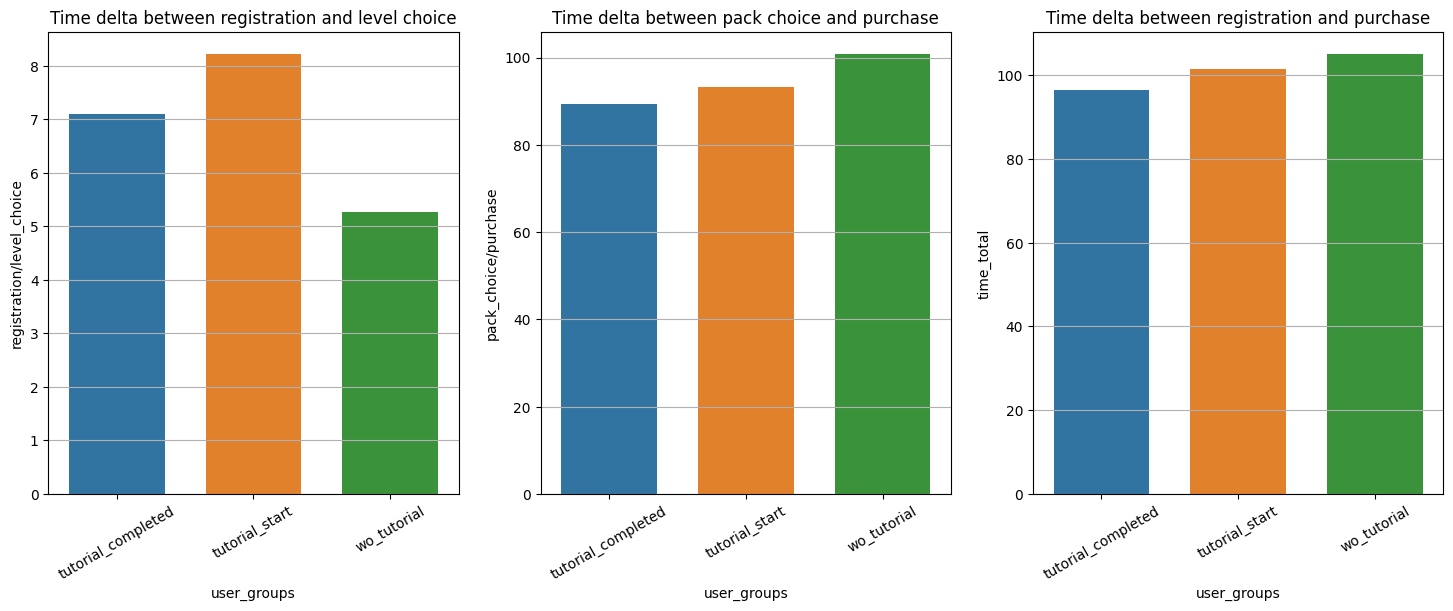

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

barplot1 = sns.barplot(
    data=grouped_pivot,
    x='user_groups',
    y='registration/level_choice',
    ax = axes[0],
    width=0.7
);
barplot1.set_title('Time delta between registration and level choice', fontsize=12)
barplot1.grid(axis='y')
barplot1.set_xticklabels(barplot1.get_xticklabels(),rotation = 30)

barplot2 = sns.barplot(
    data=grouped_pivot,
    x='user_groups',
    y='pack_choice/purchase',
    ax = axes[1],
    width=0.7
);
barplot2.set_title('Time delta between pack choice and purchase', fontsize=12)
barplot2.grid(axis='y')
barplot2.set_xticklabels(barplot2.get_xticklabels(),rotation = 30)

barplot3 = sns.barplot(
    data=grouped_pivot,
    x='user_groups',
    y='time_total',
    ax = axes[2],
    width=0.7
);
barplot3.set_title('Time delta between registration and purchase', fontsize=12)
barplot3.grid(axis='y')
barplot3.set_xticklabels(barplot3.get_xticklabels(),rotation = 30);

**Выводы по гипотезе №1.**

В результате анализа данных о времени, которые затрачивают пользователи на прохождение этапов игры, было выявлено, что пользователи, которые не проходили обучение, затрачивают, в среднем, на 2 часа меньше времени на этапы от регистрации до выбора уровня сложности вопросов по сравнению с игроками, которые полностью прошли обучение (5ч для группы без обучения и 7ч для группы с обучением). 
Однако при рассмотрении всего пути пользователя (от момента регистрации до покупки пакета платных вопросов) было получено, что общее время для пользователей с обучением меньше, чем у пользователей без обучения (96,5ч против 105ч соответственно). Таким образом, можно сделать вывод о том, что прохождение обучения значительно сокращает время до осуществления покупки платных вопросов.

**Гипотеза №2.** Повторное прохождение обучения положительно влияет на оплату?

In [15]:
total_events_df.head()

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount,user_groups
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN,wo_tutorial
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN,tutorial_completed
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN,tutorial_completed
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN,tutorial_completed
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN,tutorial_completed


In [16]:
# Из датафрейма total_events_df создаем новый датафрейм, в котором отображается количество попыток старта обучения
# для каждого пользователя.
tutorial_attemps_df=total_events_df.groupby('user_id')['tutorial_id'].nunique().reset_index()
tutorial_attemps_df.columns=['users', 'tutorial_attempts']
display(tutorial_attemps_df)

,users,tutorial_attempts
0,27832,0
1,27833,1
2,27834,1
3,27835,1
4,27836,2
...,...,...
19921,47753,1
19922,47754,0
19923,47755,1
19924,47756,1


In [17]:
# Добавляем столбец, в котором указывается признак клиента (0 - если нет покупки, 1 - если осуществлялась покупка)
purchase_users = set(purchase_2018['user_id'])
tutorial_attemps_df['clients'] = tutorial_attemps_df['users'].apply(lambda x: 1 if x in purchase_users else 0)
display(tutorial_attemps_df)

,users,tutorial_attempts,clients
0,27832,0,0
1,27833,1,0
2,27834,1,0
3,27835,1,0
4,27836,2,0
...,...,...,...
19921,47753,1,0
19922,47754,0,0
19923,47755,1,0
19924,47756,1,0


In [18]:
# Группируем пользоветелей по количеству обучений.
tutorial_groups_df = tutorial_attemps_df.groupby('tutorial_attempts')['users'].agg('count').reset_index()
display(tutorial_groups_df)

,tutorial_attempts,users
0,0,8068
1,1,9103
2,2,1589
3,3,427
4,4,221
5,5,109
6,6,116
7,7,94
8,8,86
9,9,113


In [19]:
# Группируем клиентов по количеству обучений.
purchase_groups_df = tutorial_attemps_df.groupby('tutorial_attempts')['clients'].agg('sum').reset_index()
display(purchase_groups_df)

,tutorial_attempts,clients
0,0,22
1,1,1207
2,2,218
3,3,51
4,4,30
5,5,16
6,6,14
7,7,12
8,8,13
9,9,17


In [20]:
# Объединяем данные из двух таблиц по количеству обучений.
merged_groups_df = tutorial_groups_df.merge(purchase_groups_df, on='tutorial_attempts')
display(merged_groups_df)

,tutorial_attempts,users,clients
0,0,8068,22
1,1,9103,1207
2,2,1589,218
3,3,427,51
4,4,221,30
5,5,109,16
6,6,116,14
7,7,94,12
8,8,86,13
9,9,113,17


In [21]:
# Создаем новый столбец, в котором рассчитываем конверсию из пользователей в клиенты.
merged_groups_df['conversion'] = round(merged_groups_df['clients']/merged_groups_df['users']*100,2)
display(merged_groups_df)

,tutorial_attempts,users,clients,conversion
0,0,8068,22,0.27
1,1,9103,1207,13.26
2,2,1589,218,13.72
3,3,427,51,11.94
4,4,221,30,13.57
5,5,109,16,14.68
6,6,116,14,12.07
7,7,94,12,12.77
8,8,86,13,15.12
9,9,113,17,15.04


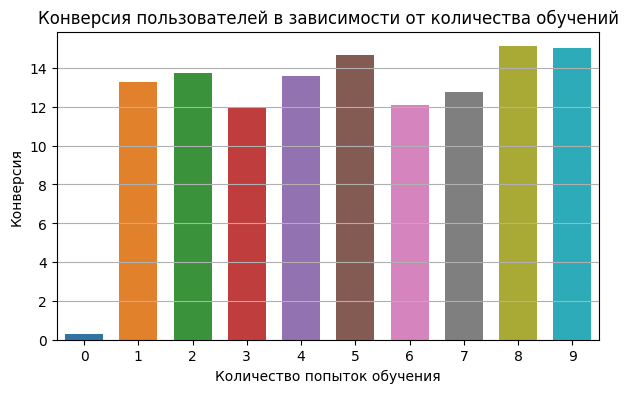

In [22]:
# Строим столбчатую диаграмму для отображения конверсии из пользователей в клиенты.
fig = plt.figure(figsize=(7, 4))
barplot = sns.barplot(
    data=merged_groups_df,
    y='conversion',
    x='tutorial_attempts',
    width=0.7
)
barplot.set_title('Конверсия пользователей в зависимости от количества обучений');
barplot.set_xlabel('Количество попыток обучения')
barplot.set_ylabel('Конверсия')
barplot.grid(axis='y')

**Выводы по гипотезе №2.**

При прохождении обучения значительно увеличивается конверсия из пользователей в клиенты (с 0,27% без обучения до 12-15% при наличии обучения), при этом конверсия равномерная независимо от количество попыток обучения. Таким образом, прохождение обучения повышает вероятность покупки платных пакетов вопросов, что подтверждает гипотезу №2.

**Гипотеза №3.** Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение?

In [23]:
# Создаем датафрейм со временем начала обучения.
tutorial_start_df = total_events_df [total_events_df['event_type'] == 'tutorial_start']
tutorial_start_df = tutorial_start_df [['user_id','start_time']].rename(columns={'start_time':'tutorial_start_time'})

display(tutorial_start_df)

,user_id,tutorial_start_time
7,27836,2018-01-01 14:54:40
8,27835,2018-01-01 15:00:51
10,27836,2018-01-01 15:40:43
12,27833,2018-01-01 17:47:40
15,27839,2018-01-01 19:11:36
...,...,...
66934,47747,2018-12-31 10:21:11
66943,47751,2018-12-31 19:38:14
66945,47753,2018-12-31 20:54:56
66952,47755,2019-01-01 00:08:14


In [24]:
# Создаем датафрейм с выбором уровня сложности вопросов.
level_choice_df = total_events_df [total_events_df['event_type'] == 'level_choice']
level_choice_df = level_choice_df [['user_id','start_time']].rename(columns={'start_time':'level_start_time'})

display(level_choice_df)

,user_id,level_start_time
19,27835,2018-01-01 20:37:22
23,27839,2018-01-01 22:37:50
36,27840,2018-01-02 05:18:42
38,27845,2018-01-02 06:19:18
45,27842,2018-01-02 08:46:03
...,...,...
66932,47732,2018-12-31 09:59:00
66937,47747,2018-12-31 12:24:40
66948,47753,2018-12-31 22:36:19
66956,47755,2019-01-01 05:04:52


In [25]:
# Объединяем полученные датафреймы по идентификатору пользователя, рассчитываем время между началом обучения и
# выбором уровня сложности.
merged_df = tutorial_start_df.merge(level_choice_df, on='user_id',how='inner')
merged_df ['timedelta'] = merged_df['tutorial_start_time'] - merged_df ['level_start_time']
merged_df ['timedelta'] = round (merged_df['timedelta']/pd.Timedelta('1 hour'),2)
display(merged_df)

,user_id,tutorial_start_time,level_start_time,timedelta
0,27835,2018-01-01 15:00:51,2018-01-01 20:37:22,-5.61
1,27839,2018-01-01 19:11:36,2018-01-01 22:37:50,-3.44
2,27840,2018-01-02 02:07:07,2018-01-02 05:18:42,-3.19
3,27845,2018-01-02 03:03:44,2018-01-02 06:19:18,-3.26
4,27845,2018-01-02 07:08:00,2018-01-02 06:19:18,0.81
...,...,...,...,...
12681,47732,2018-12-31 07:14:38,2018-12-31 09:59:00,-2.74
12682,47747,2018-12-31 10:21:11,2018-12-31 12:24:40,-2.06
12683,47753,2018-12-31 20:54:56,2018-12-31 22:36:19,-1.69
12684,47755,2019-01-01 00:08:14,2019-01-01 05:04:52,-4.94


In [26]:
# Создаем функцию для определения последовательности событий (обучение и выбор сложности вопросов) и 
# добавляем новый столбец в таблицу.
def time_difference(x):
    if x < 0:
        return 0
    else:
        return 1
    
merged_df['level_choice_first'] = merged_df['timedelta'].apply(time_difference)
display(merged_df)

,user_id,tutorial_start_time,level_start_time,timedelta,level_choice_first
0,27835,2018-01-01 15:00:51,2018-01-01 20:37:22,-5.61,0
1,27839,2018-01-01 19:11:36,2018-01-01 22:37:50,-3.44,0
2,27840,2018-01-02 02:07:07,2018-01-02 05:18:42,-3.19,0
3,27845,2018-01-02 03:03:44,2018-01-02 06:19:18,-3.26,0
4,27845,2018-01-02 07:08:00,2018-01-02 06:19:18,0.81,1
...,...,...,...,...,...
12681,47732,2018-12-31 07:14:38,2018-12-31 09:59:00,-2.74,0
12682,47747,2018-12-31 10:21:11,2018-12-31 12:24:40,-2.06,0
12683,47753,2018-12-31 20:54:56,2018-12-31 22:36:19,-1.69,0
12684,47755,2019-01-01 00:08:14,2019-01-01 05:04:52,-4.94,0


In [27]:
# Группируем пользователей по созданному признаку level_choice_first.
merged_df = merged_df.groupby('level_choice_first')['user_id'].agg('nunique')
display(merged_df)

level_choice_first
0    8244
1    1386
Name: user_id, dtype: int64

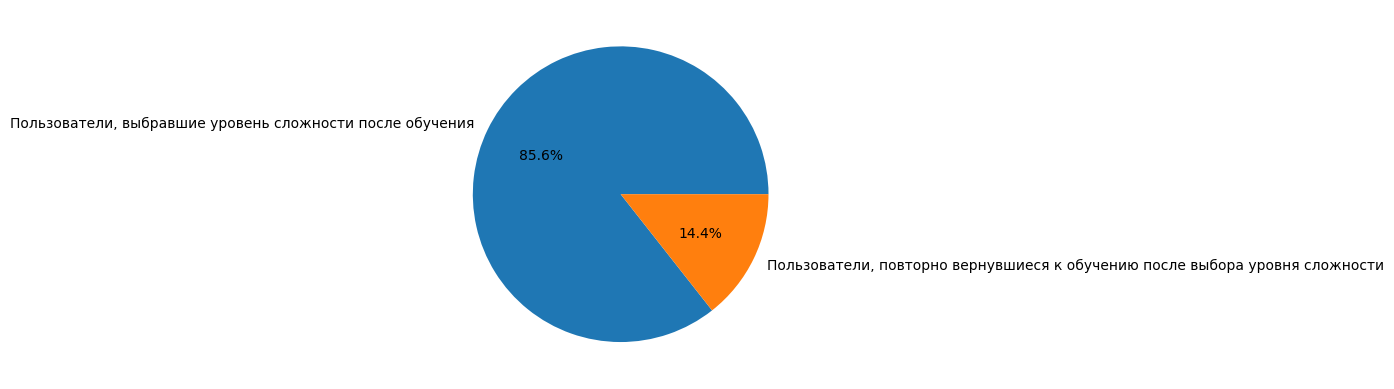

In [28]:
# Определяем данные для построения диаграммы
data = [8244,1386]
labels = ['Пользователи, выбравшие уровень сложности после обучения','Пользователи, повторно вернувшиеся к обучению после выбора уровня сложности']

plt.pie(data, labels = labels, autopct='%.1f%%');

**Выводы по гипотезе №3.**

В результате анализа данных пользователей было получено, что 14% всех пользователей, которые выбрали уровень сложности, повторно проходили обучение, что говорит о том, что необходимо улучшить обучение, сделать его более подробным и понятным для пользователей.


**ВЫВОДЫ ПО ПРОЕКТУ**

1. При рассмотрении всего пути пользователя (от момента регистрации до покупки пакета платных вопросов) было получено, что общее время для пользователей с обучением меньше, чем у пользователей без обучения (96,5ч против 105ч соответственно). Следовательно, прохождение обучения значительно сокращает время до осуществления покупки платных вопросов.
2. При прохождении обучения значительно увеличивается конверсия из пользователей в клиенты (с 0,27% без обучения до 12-15% при наличии обучения), при этом конверсия равномерная независимо от количество попыток обучения. Таким образом, прохождение обучения повышает вероятность покупки платных пакетов вопросов.
3. В результате анализа данных пользователей было получено, что 14% всех пользователей, которые выбрали уровень сложности, повторно проходили обучение, что говорит о том, что необходимо улучшить обучение, сделать его более подробным и понятным для пользователей.